In [1]:
include("PVCR.jl");

## Change in residential tariff with new rules. No PV
### Consumer 275 kWh/month

In [2]:
PVRes.capacity = 0.0
residential.econsumption = 275; get_pmax(residential);
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [3]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [4]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

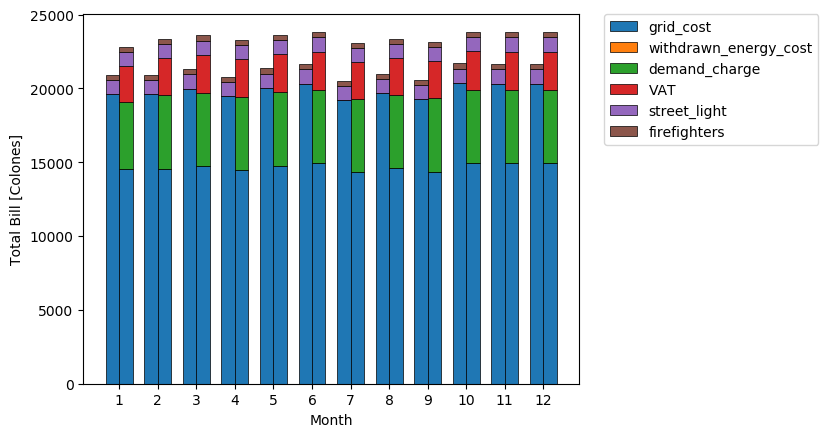

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [5]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

In [6]:
bills_residential1[1]["savings"]

Dict{String,Any} with 5 entries:
  "demand_charges"      => 0.0
  "street_light"        => 0.0
  "VAT"                 => 0.0
  "grid_energy_savings" => 0.0
  "firefighters"        => 0.0

## Change in residential tariff with new rules. PV System installed
### Consumer 275 kWh/month 1 kW PV System

In [23]:
PVRes.capacity = 1.0
residential.tariff = R_CNFL
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [24]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [25]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

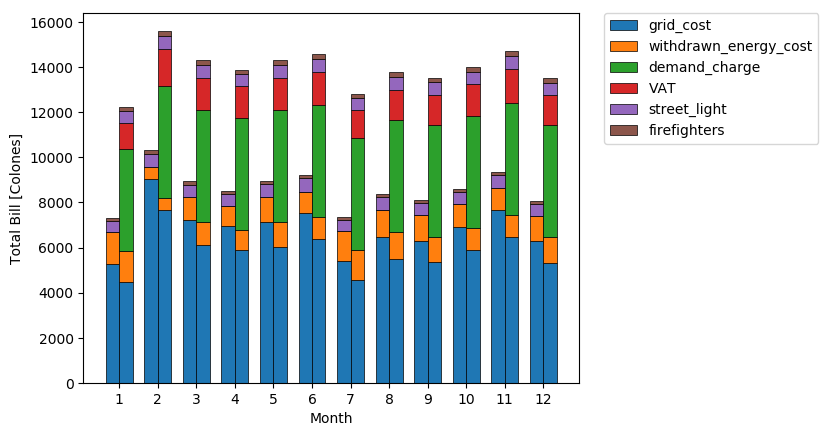

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [26]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])